In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('play_tennis.csv')
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
data['play'].value_counts()

Yes    9
No     5
Name: play, dtype: int64

In [4]:
py=9/14
pn=5/14


In [18]:
#outlook
pd.crosstab(data['outlook'],data['play'])

play,No,Yes
outlook,,
Overcast,0,4
Rain,2,3
Sunny,3,2


In [8]:
#in Outlook for p(no)
Pon=0
Prn=2/5
Psn=3/5

#in Outlook for p(yes)
Poy=4/9
Pry=3/9
Psy=2/9

In [9]:
#Tempreture
pd.crosstab(data['temp'],data['play'])

play,No,Yes
temp,,
Cool,1,3
Hot,2,2
Mild,2,4


In [10]:
#in Tempreture for p(no)
Pcn=1/5
Phn=2/5
Pmn=2/5

#in Tempreture for p(yes)
Pcy=3/9
Phy=2/9
Pmy=4/9

In [12]:
#Humidity
pd.crosstab(data['humidity'],data['play'])


play,No,Yes
humidity,,
High,4,3
Normal,1,6


In [13]:
#in Humidity for p(no)
Phhn=4/5
Phnn=1/5

#in Humidity for p(yes)
Phhy=3/9
Pnmy=6/9

In [14]:
#wind
pd.crosstab(data['wind'],data['play'])

play,No,Yes
wind,,
Strong,3,3
Weak,2,6


In [17]:
#in wind for p(no)
Psn=3/5
Pwn=2/5

#in wind for p(no)
Psgy=3/9
Pwky=6/9

In [20]:
#problem  :

# Outlook=Sunny, Tempreture= Hot, Humidity=High, Wind=Weak

prob_y=py*Psy*Phy*Phhy*Pwky
prob_y
prob_n=pn*Psn*Phn*Phnn*Pwn
prob_n

0.006857142857142858

In [21]:
print(prob_y/(prob_y+prob_n))
print(prob_n/(prob_y+prob_n))

0.5070993914807302
0.49290060851926987


#### Here We Can Say That We Play Becouse P(Yes) is : 0.5070

In [24]:
#problem  :

# Outlook=Rainy, Tempreture= Cool, Humidity=Normal, Wind=Stong

prob_y=py*Pry*Pcy*Pnmy*Psgy
prob_y
prob_n=pn*Prn*Pcn*Phnn*Psn
prob_n

0.0034285714285714297

In [25]:
print(prob_y/(prob_y+prob_n))
print(prob_n/(prob_y+prob_n))

0.8223684210526315
0.17763157894736847


#### Here We Can Say That We Play Becouse P(Yes) is : 0.8223

## Naive Baye's Goussian Distibution for Continues Data

In [29]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [30]:
df=load_iris()
data=df.data
target=df.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [31]:
data=pd.DataFrame(data=data,columns=df.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [32]:
X=data
y=target

In [33]:
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.30,random_state=0)

In [34]:
model=GaussianNB()
model.fit(train_x,train_y)
y_pred=model.predict(test_x)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [62]:
accuracy_score(test_y,y_pred)

1.0

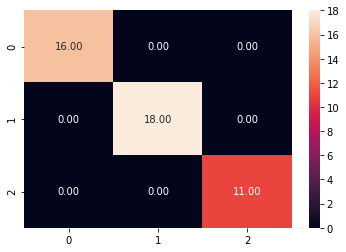

In [64]:
sns.heatmap(confusion_matrix(test_y,y_pred),annot=True,fmt='0.2f')